In [312]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [313]:
df = pd.read_csv('coaster_db.csv')

Step 1: 

- Data Understanding

- Dataframe shape

- Head and tail


In [314]:
df.shape

(1087, 56)

In [315]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


In [316]:
df.columns

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [317]:
df.dtypes

coaster_name                      object
Length                            object
Speed                             object
Location                          object
Status                            object
Opening date                      object
Type                              object
Manufacturer                      object
Height restriction                object
Model                             object
Height                            object
Inversions                       float64
Lift/launch system                object
Cost                              object
Trains                            object
Park section                      object
Duration                          object
Capacity                          object
G-force                           object
Designer                          object
Max vertical angle                object
Drop                              object
Soft opening date                 object
Fast Lane available               object
Replaced        

Step 2: Data Preperation

- Dropping irrelevant columns and rows

- Identifying duplicated columns

- Renaming Columns


In [318]:
df = df[['coaster_name',
    # 'Length', 'Speed',
    'Location', 'Status',
    # 'Opening date',
    #   'Type',
    'Manufacturer',
#     'Height restriction', 'Model', 'Height',
#        'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
#        'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
#        'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
#        'Track layout', 'Fastrack available', 'Soft opening date.1',
#        'Closing date',
#     'Opened', 
    # 'Replaced by', 'Website',
#        'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
#        'Single rider line available', 'Restraint Style',
#        'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced',
        'latitude', 'longitude',
    'Type_Main',
       'opening_date_clean',
    #'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 
    #'height_value', 'height_unit',
    'height_ft',
       'Inversions_clean', 'Gforce_clean']].copy()

In [319]:
df['opening_date_clean'] = pd.to_datetime(df['opening_date_clean'], errors='coerce')

In [320]:
df.columns

Index(['coaster_name', 'Location', 'Status', 'Manufacturer', 'year_introduced',
       'latitude', 'longitude', 'Type_Main', 'opening_date_clean', 'speed_mph',
       'height_ft', 'Inversions_clean', 'Gforce_clean'],
      dtype='object')

In [321]:
df = df.rename(columns={'Location': 'location',
                    'Status': 'status',
                    'Manufacturer': 'manufacturer',
                    'Inversions_clean': 'inversions',
                    'Type_Main': 'type',
                    'Gforce_clean': 'gforce',
                    'opening_date_clean': 'opening_date',}) 

In [322]:
df.isna().sum()

coaster_name         0
location             0
status             213
manufacturer        59
year_introduced      0
latitude           275
longitude          275
type                 0
opening_date       250
speed_mph          150
height_ft          916
inversions           0
gforce             725
dtype: int64

In [323]:
df.loc[df.duplicated]

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type,opening_date,speed_mph,height_ft,inversions,gforce


In [324]:
df.loc[df.duplicated(subset=['coaster_name'])]

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type,opening_date,speed_mph,height_ft,inversions,gforce
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
60,Derby Racer,Revere Beach,Removed,Fred W. Pearce,1937,42.4200,-70.9860,Wood,1911-01-01,NaN,NaN,0,NaN
61,Blue Streak (Conneaut Lake),Conneaut Lake Park,Closed,NaN,1938,41.6349,-80.3180,Wood,1938-05-23,50.0,NaN,0,NaN
167,Big Thunder Mountain Railroad,Other,NaN,Arrow Development (California and Florida)Dyna...,1980,NaN,NaN,Steel,NaT,35.0,NaN,0,NaN
237,Thunder Run (Canada's Wonderland),Canada's Wonderland,Operating,Mack Rides,1986,43.8427,-79.5423,Steel,1981-05-23,39.8,32.8,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,Lil' Devil Coaster,Six Flags Great Adventure,Operating,Zamperla,2021,40.1343,-74.4434,Steel,1999-01-01,NaN,NaN,0,NaN
1064,Little Dipper (Conneaut Lake Park),Conneaut Lake Park,Operating,Allan Herschell Company,2021,41.6343,-80.3165,Steel,1950-01-01,NaN,NaN,0,NaN
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Rocky Mountain Construction,2022,28.0339,-82.4231,Steel,NaT,76.0,NaN,2,NaN
1082,American Dreier Looping,Other,NaN,Anton Schwarzkopf,2022,NaN,NaN,Steel,NaT,53.0,NaN,3,4.7


In [325]:
df.query('coaster_name == "Crystal Beach Cyclone"')

,coaster_name,location,status,manufacturer,year_introduced,latitude,longitude,type,opening_date,speed_mph,height_ft,inversions,gforce
39,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1926,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0
43,Crystal Beach Cyclone,Crystal Beach Park,Removed,Traver Engineering,1927,42.8617,-79.0598,Wood,1926-01-01,60.0,NaN,0,4.0


In [326]:
df = df.loc[~df.duplicated(subset=['coaster_name','location','opening_date'])] \
    .reset_index(drop=True).copy()

In [327]:
df.shape

(990, 13)

Step 3: Feature Understanding¶
(Univariate analysis)

- Plotting Feature Distributions

- Histogram

- Boxplot

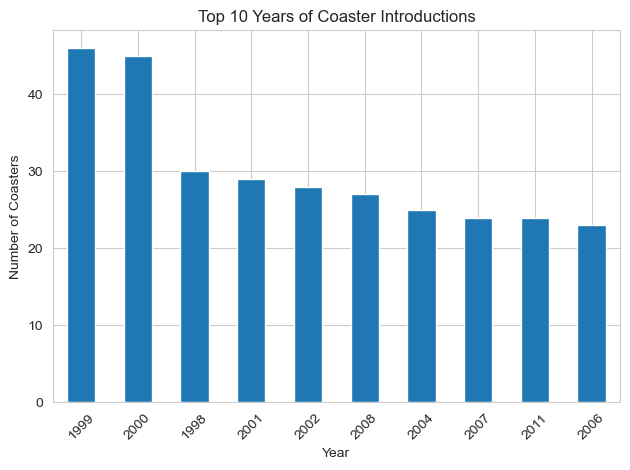

In [328]:
ax = df['year_introduced'].value_counts().head(10).plot(kind='bar', title='Top 10 Years of Coaster Introductions')

ax.set_xlabel('Year')
ax.set_ylabel('Number of Coasters')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

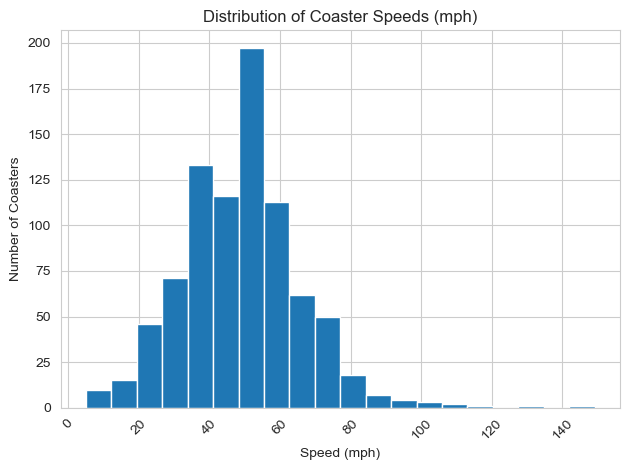

In [329]:
ax = df['speed_mph'].plot(kind='hist', bins=20, title='Distribution of Coaster Speeds (mph)')
ax.set_xlabel('Speed (mph)')
ax.set_ylabel('Number of Coasters') 
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Step 4: Feature Relationships¶

- Scatterplot

- Heatmap Correlation

- Pairplot

- Groupby comparisons

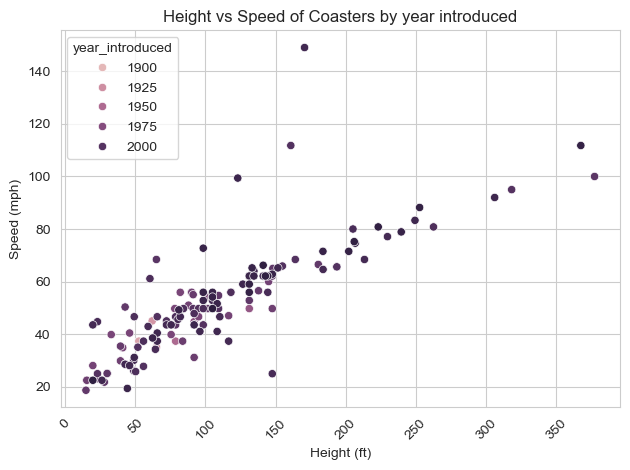

In [341]:
sns.scatterplot(data=df, x='height_ft', y='speed_mph', hue='year_introduced',)
plt.title('Height vs Speed of Coasters by year introduced')    
plt.xlabel('Height (ft)')
plt.ylabel('Speed (mph)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



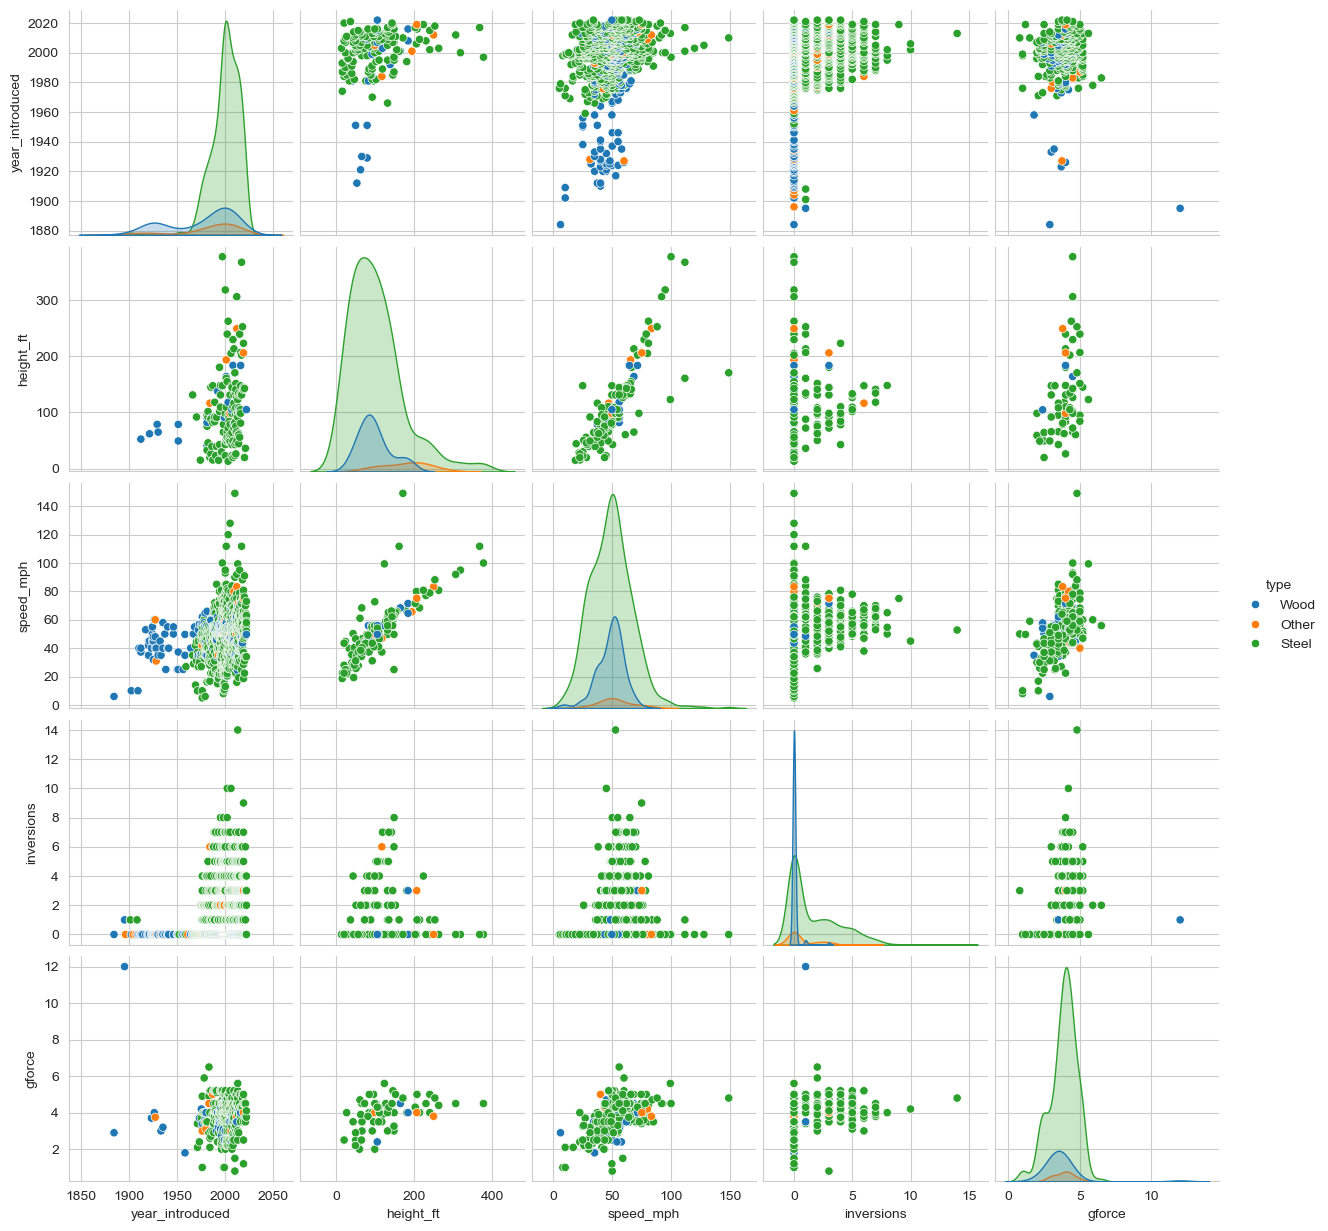

In [351]:
sns.pairplot(df,vars=['year_introduced' ,'height_ft', 'speed_mph', 'inversions', 'gforce'], hue= 'type')

plt.show()

In [355]:
df_corr = df[['year_introduced' ,'height_ft', 'speed_mph', 'inversions', 'gforce']].dropna().corr()

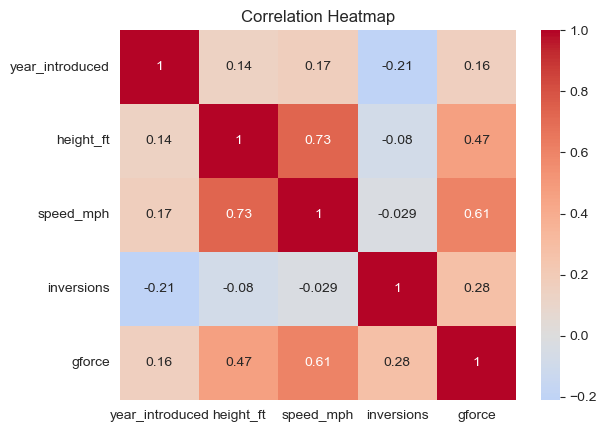

In [358]:
sns.heatmap(df_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()